In [60]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [61]:
# Load data
df= pd.read_csv(r"C:\Users\thobi\Downloads\insurance.csv")
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [62]:
#checking for missing data
df.isnull().sum

<bound method DataFrame.sum of         age    sex    bmi  children  smoker  region  charges
0     False  False  False     False   False   False    False
1     False  False  False     False   False   False    False
2     False  False  False     False   False   False    False
3     False  False  False     False   False   False    False
4     False  False  False     False   False   False    False
...     ...    ...    ...       ...     ...     ...      ...
1333  False  False  False     False   False   False    False
1334  False  False  False     False   False   False    False
1335  False  False  False     False   False   False    False
1336  False  False  False     False   False   False    False
1337  False  False  False     False   False   False    False

[1338 rows x 7 columns]>

In [63]:
#Categorial
categorial = df.select_dtypes(exclude=['int',float])
print(categorial.columns)

Index(['sex', 'smoker', 'region'], dtype='object')


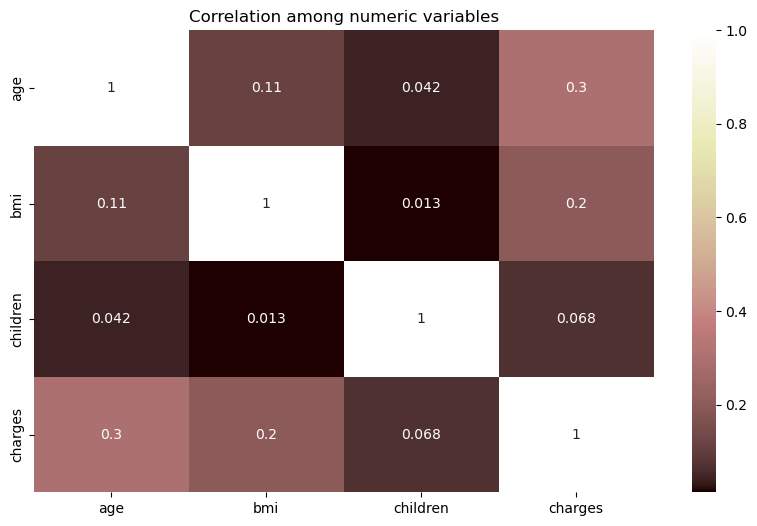

In [64]:
#Correlation among variables
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="pink")
plt.title("Correlation among numeric variables")
plt.show()

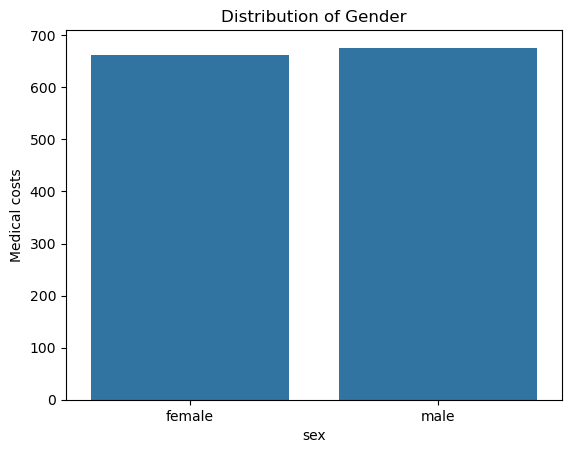

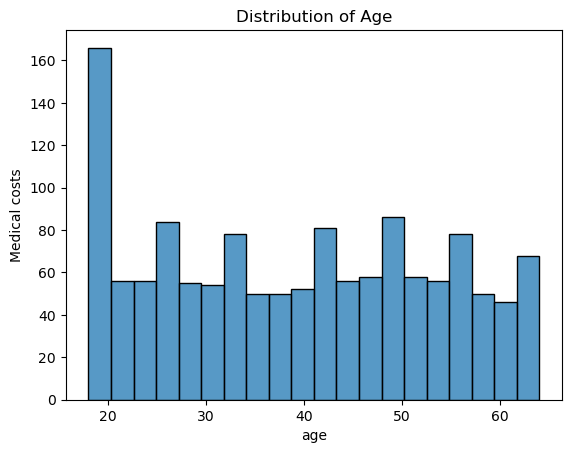

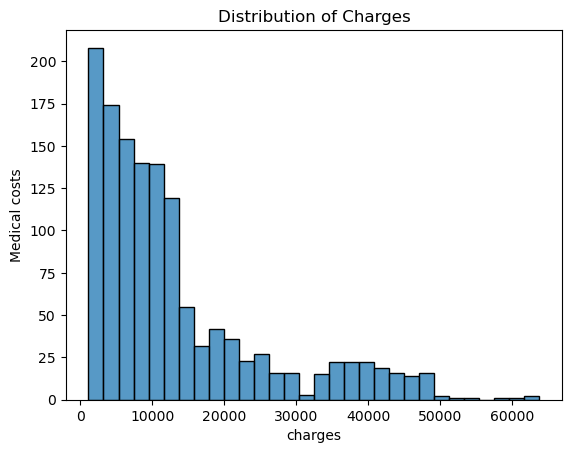

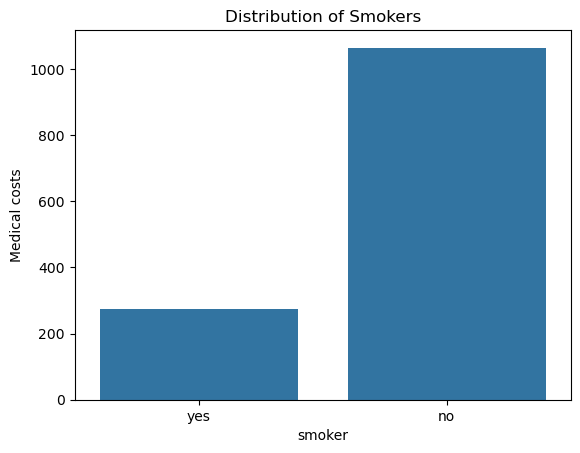

In [65]:
#Distribution of Gender,Age,charges,smokers

sns.countplot(x='sex', data=df)
plt.title("Distribution of Gender")
plt.ylabel("Medical costs")
plt.show()

sns.histplot(df['age'], bins=20)
plt.title("Distribution of Age")
plt.ylabel("Medical costs")
plt.show()

sns.histplot(df['charges'], bins=30)
plt.title("Distribution of Charges")
plt.ylabel("Medical costs")
plt.show()

sns.countplot(x='smoker', data=df)
plt.title("Distribution of Smokers")
plt.ylabel("Medical costs")
plt.show()

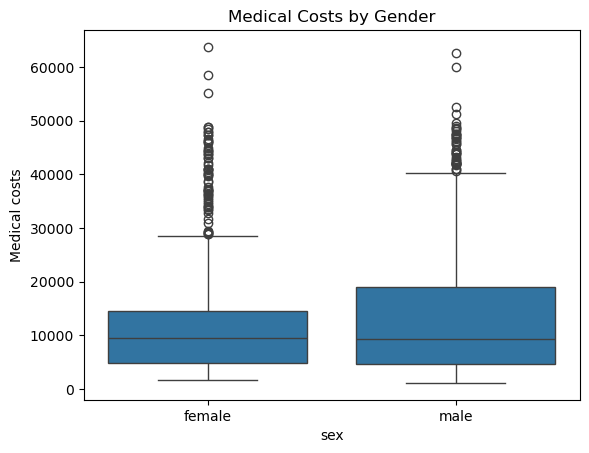

In [66]:
#Distribution of medical costs between males and females

sns.boxplot(x='sex', y='charges', data=df)
plt.title("Medical Costs by Gender")
plt.ylabel("Medical costs")
plt.show()

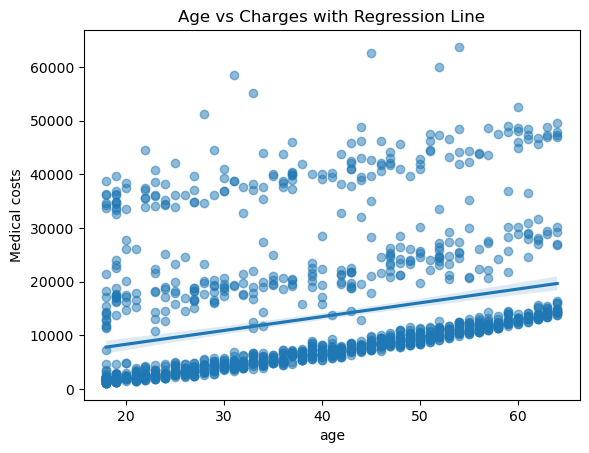

In [67]:
#Distribution of medical costs and age(not sure if needed)

sns.regplot(x='age', y='charges', data=df, scatter_kws={'alpha':0.5})
plt.title("Age vs Charges with Regression Line")
plt.ylabel("Medical costs")
plt.show()

In [68]:
#Encoding categorial variables
encoder =LabelEncoder()
encoded_data = data.copy()
for column in ["sex","smoker","region"]:
    encoded_data[column] = encoder.fit_transform(data[column])
print(encoded_data.head())

   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       0  16884.92400
1   18    1  33.770         1       0       1   1725.55230
2   28    1  33.000         3       0       1   4449.46200
3   33    1  22.705         0       0       2  21984.47061
4   32    1  28.880         0       0       2   3866.85520


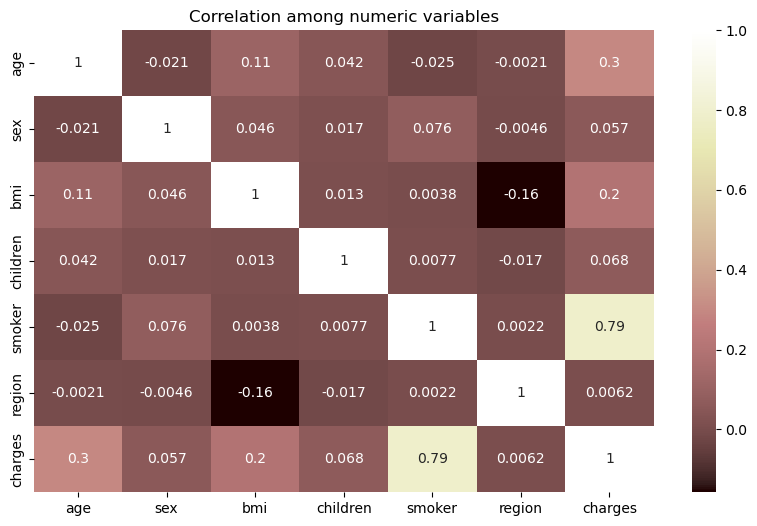

In [69]:
#Correlation among variables
plt.figure(figsize=(10,6))
sns.heatmap(encoded_data.corr(), annot=True, cmap="pink")
plt.title("Correlation among numeric variables")
plt.show()

In [70]:
X = encoded_data.drop(['charges','region'],axis=1)
Y = encoded_data['charges']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [71]:
#Linear regression model
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [72]:
#PREDICTIONS
Y_pred = lr.predict(X_test)

In [73]:
#Evaluate
from sklearn.metrics import mean_absolute_error
r2 = r2_score(Y_test, Y_pred)
mse = mean_squared_error(Y_test,Y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test,Y_pred)

print("Model evaluation:")
print("r2score:" ,r2)
print("Mean square error:",mse)
print("Root mean square error:",rmse)
print("Mean absolute error:",mae)

Model evaluation:
r2score: 0.7692173718725764
Mean square error: 39435416.858202234
Root mean square error: 6279.762484218829
Mean absolute error: 4371.682756217577
